In [1]:
from datetime import datetime
from gym.wrappers import Monitor
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np 

%load_ext autoreload

In [2]:
import random 

# Create a random agent
class RandomAgent(object):
    def __init__(self, actions_n):
        self.actions_n = actions_n

    def act(self, observation, reward, done):
        return random.randint(0, self.actions_n - 1)

Finished episode 1. Episode reward: -299.9999363907277
Finished episode 2. Episode reward: -299.9996884053596
Finished episode 3. Episode reward: -299.999800590698
Finished episode 4. Episode reward: -299.9999875079641
Finished episode 5. Episode reward: -299.99148674082227
Finished episode 6. Episode reward: -299.99969669267443
Finished episode 7. Episode reward: -299.9999553295439
Finished episode 8. Episode reward: -299.99633760740033
Finished episode 9. Episode reward: -299.9991457347069
Finished episode 10. Episode reward: -299.9980087118918


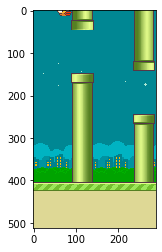

In [6]:
from utils import generate_gif
from environment import FlappyBirdWrapper
%autoreload 2

env = FlappyBirdWrapper(screen_output=True)

# print("Action space is: {}".format(env.action_space))

agent = RandomAgent(2)

episode_count = 10
reward = 0
done = False

samples = []
frames_for_gif = []

for i in range(episode_count):
    with tf.Session() as sess:
        ob = env.reset()
        episode_reward = 0
    
        while True:
            action = agent.act(ob, reward, done)
            ob, reward, done, _ = env.step(action)
            plt.imshow(ob)
            frames_for_gif.append(ob)
            samples.append(ob)
            episode_reward += reward
            if done:
                print("Finished episode {}. Episode reward: {}". format(i+1, episode_reward))
                break
            

env.close()
generate_gif(frames_for_gif, 1, episode_reward, './vid/')


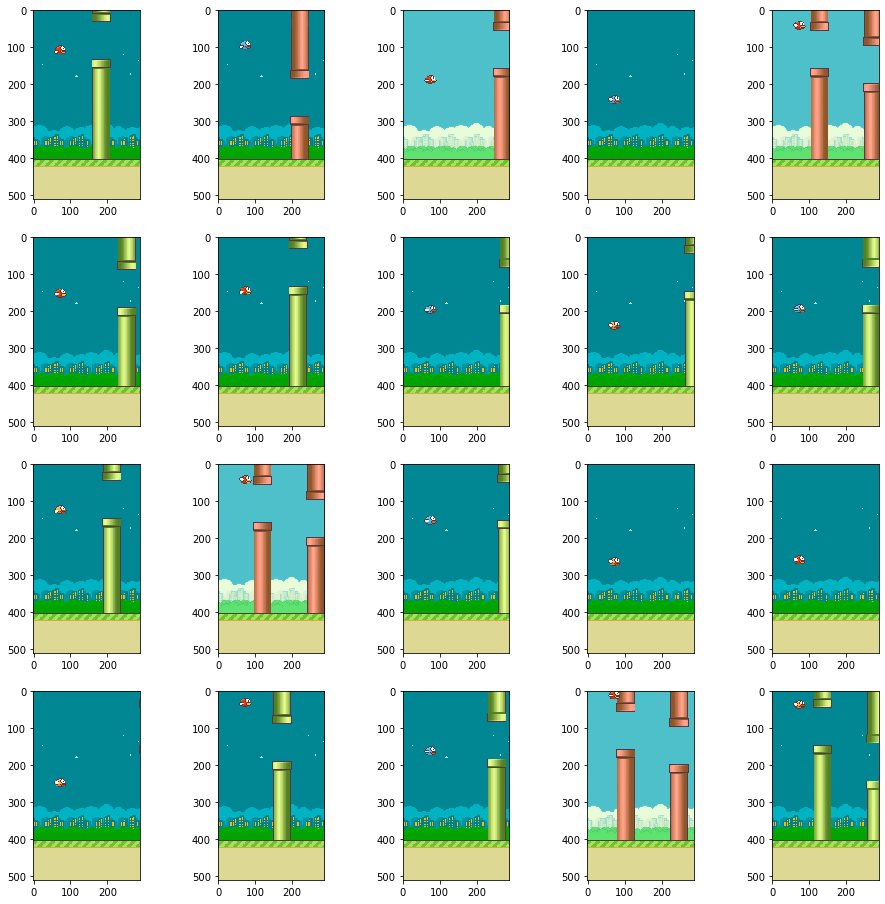

In [7]:
fig = plt.figure(figsize=(16, 16))
rows = 4
for i, img in enumerate(random.sample(frames_for_gif, 20)):
    fig.add_subplot(rows, 5, i + 1)
    plt.imshow(img, cmap='gray')

In [71]:
import glob, io, base64
from IPython.display import HTML
import random

# obtain all videos 
videos = [v for v in glob.glob("vid/*.gif")]

#display random episode
video_path = random.choice(videos)
video = io.open(video_path, 'r+b').read()
encoded = base64.b64encode(video)
HTML('<img src="{}">'.format(video_path))

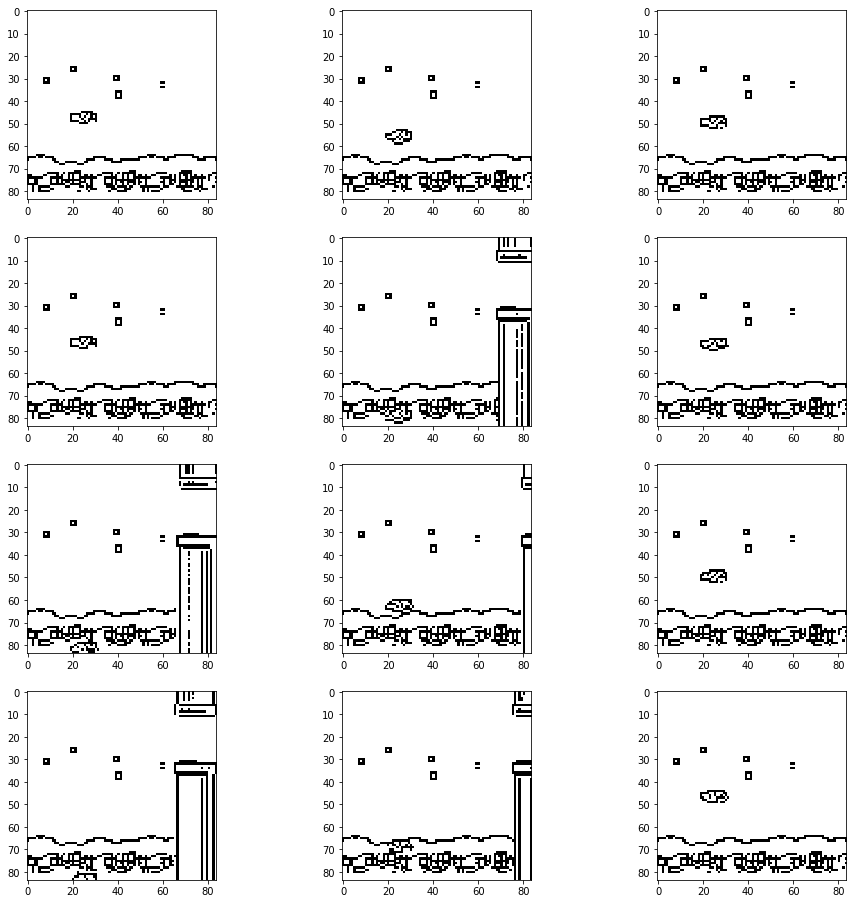

In [82]:
from image_transformer import ImageTransformer
import tensorflow as tf
import random


transformer = ImageTransformer(crop_boundaries=(0, 0, 400, 238))
sess = tf.Session()
images = [transformer.transform(s, sess) for s in random.sample(samples, 12)]
# images = [s for s in random.sample(samples, 12)]
fig = plt.figure(figsize=(16, 16))
rows = 4
for i, img in enumerate(images):
    fig.add_subplot(rows, 3, i + 1)
    plt.imshow(img, cmap='gray')
# plt.imshow(masked, cmap='gray')



In [83]:
print(range(2))

range(0, 2)


[autoreload of six failed: Traceback (most recent call last):
  File "/home/yoba/.local/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/home/yoba/.local/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    update_generic(old_obj, new_obj)
  File "/home/yoba/.local/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 331, in update_generic
    update(a, b)
  File "/home/yoba/.local/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 274, in update_class
    old_obj = getattr(old, key)
  File "/home/yoba/.local/lib/python3.5/site-packages/six.py", line 93, in __get__
    setattr(obj, self.name, result)  # Invokes __set__.
AttributeError: 'NoneType' object has no attribute 'unquote_plus'
]
[autoreload of dateutil.tz failed: Traceback (most recent call last):
  File "/home/yoba/.local/lib/python3.5/site-packages/IPython/extensions/aut